In [19]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [1]:
# Numerical libraries
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

#importing seaborn for statistical plots
import seaborn as sns

In [3]:
# reading the .dat file from internet into pandas dataframe
airq_df = pd.read_table("http://www.stat.ufl.edu/~winner/data/airq402.dat", sep="\s+", usecols = [0,1,2,3,4,5,6,7,8,9,10], names = ['City1','City2','Average Fare', 'Distance', 'Average weekly passengers', 'market leading airline', 'market share lead', 'Average fare', 'Low price airline','market share low', 'price'])
airq_df

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share lead,Average fare,Low price airline,market share low,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42
5,ALB,FLL,135.17,1204,199.02,WN,40.68,137.97,DL,17.09,127.69
6,ALB,LAS,152.85,2237,237.17,WN,59.94,148.59,WN,59.94,148.59
7,ALB,LAX,190.73,2467,191.95,DL,17.89,205.06,US,16.59,174.00
8,ALB,MCO,129.35,1073,550.54,WN,76.84,127.69,WN,76.84,127.69
9,ALB,TPA,134.17,1130,202.93,US,35.40,132.91,DL,26.40,124.78


In [32]:
# remove the outliers
for c in airq_df.columns:
    if c == "City1":
        continue
    if c == "City2":
        continue
    if c == "Market leading airline":
        continue 
    if c == "low cost airline":
        continue

    airq_df.loc[airq_df[c] > 5 * airq_df[c].mean(), c] = np.nan
    
airq_df.dropna()

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share lead,Average fare,Low price airline,market share low,price
0,CAK,ATL,114.47,528.0,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860.0,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852.0,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288.0,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723.0,313.04,UA,39.79,161.36,WN,15.34,145.42
5,ALB,FLL,135.17,1204.0,199.02,WN,40.68,137.97,DL,17.09,127.69
6,ALB,LAS,152.85,2237.0,237.17,WN,59.94,148.59,WN,59.94,148.59
7,ALB,LAX,190.73,2467.0,191.95,DL,17.89,205.06,US,16.59,174.00
8,ALB,MCO,129.35,1073.0,550.54,WN,76.84,127.69,WN,76.84,127.69
9,ALB,TPA,134.17,1130.0,202.93,US,35.40,132.91,DL,26.40,124.78


In [4]:
airq_df.corr()

,Average Fare,Distance,Average weekly passengers,market share lead,Average fare,market share low,price
Average Fare,1.000000,0.587169,-0.126175,-0.234142,0.981462,-0.458660,0.866410
Distance,0.587169,1.000000,-0.090131,-0.531406,0.564082,-0.367831,0.583239
Average weekly passengers,-0.126175,-0.090131,1.000000,-0.067605,-0.100946,0.034241,-0.142314
market share lead,-0.234142,-0.531406,-0.067605,1.000000,-0.220801,0.306832,-0.307672
Average fare,0.981462,0.564082,-0.100946,-0.220801,1.000000,-0.472838,0.826511
market share low,-0.458660,-0.367831,0.034241,0.306832,-0.472838,1.000000,-0.240186
price,0.866410,0.583239,-0.142314,-0.307672,0.826511,-0.240186,1.000000


In [5]:
# dropping all the columns where correlation with 0.1 or less. 
airq_df_x = airq_df[['Distance', 'Average fare', 'price']]
# airq_df['Average weekly passengers'].drop
airq_df_y = airq_df['Average Fare']
# airq_df_y
#airq_df

In [29]:
# dependant variable
airq_df_y

0      114.47
1      122.47
2      214.42
3       69.40
4      158.13
5      135.17
6      152.85
7      190.73
8      129.35
9      134.17
10     212.49
11     173.56
12     170.67
13     120.24
14     168.69
15     154.40
16     114.24
17     132.29
18     181.99
19     233.05
20     162.21
21     161.74
22      71.57
23     163.63
24     134.42
25     165.69
26      77.82
27     227.93
28      74.82
29     120.50
        ...  
970    110.64
971     98.36
972    263.37
973    165.13
974    177.77
975    215.04
976    122.02
977     82.34
978    148.62
979    177.91
980     74.62
981    330.21
982    134.18
983    116.78
984    237.26
985    401.23
986     77.11
987    105.84
988    144.22
989    322.83
990    156.01
991     70.61
992    162.46
993    131.47
994    288.14
995    136.16
996     83.28
997    159.97
998     73.57
999    126.67
Name: Average Fare, Length: 1000, dtype: float64

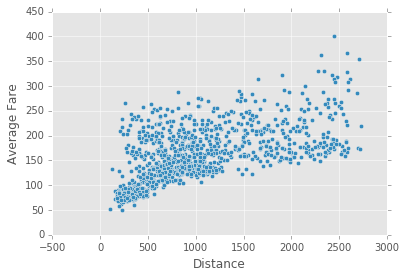

In [6]:
plt.style.use('ggplot')
airq_df.plot.scatter(x='Distance', y='Average Fare')
plt.show()
#sns.pairplot(data, diag_kind = 'kde')

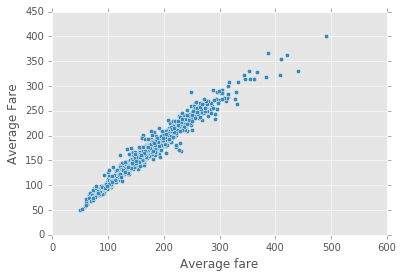

In [7]:
plt.style.use('ggplot')
# Note: I am using the original column names, where Dependant Variable is 'Average Fare' & Independant Variable 'Average fare' seens to be that of Market Leading Airline
airq_df.plot.scatter(x='Average fare', y='Average Fare')
plt.show()

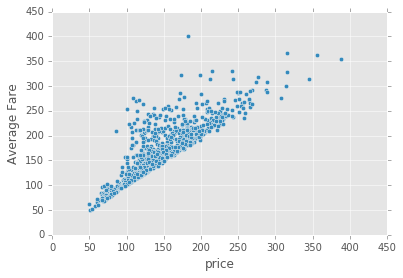

In [8]:
plt.style.use('ggplot')
# Note: I am using the original column names, where Dependant Variable is 'Average Fare' & Independant Variable 'price' seens to be that of Market Low Cost Airline's price
airq_df.plot.scatter(x='price', y='Average Fare')
plt.show()

In [9]:
#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

In [10]:
# Split airq_df_x and airq_df_y into training and test set in 75:25 ratio

X_train, X_test, y_train, y_test = train_test_split(airq_df_x, airq_df_y, test_size=0.25, random_state=1)

In [11]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
#     print("The coefficient for {} is {}", col_name, regression_model.coef_[0])
      print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))


The coefficient for Distance is 0.0015137019439436172
The coefficient for Average fare is 0.7280052360948425
The coefficient for price is 0.1987081129437633


In [13]:
regression_model.intercept_

11.871733553497904

In [14]:
regression_model.score(X_train, y_train)

0.9723270702816019

In [15]:
# we can write our linear model as:
# Y=−11.87173 + 0.00151×X1+0.72899×X2+0.198708×X3

In [16]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS =  RegErr / TSS

regression_model.score(X_test, y_test)

0.9755800200113514

In [21]:
def AdjRsquare(modelToBeTested, indData, target):
    Rsquare = modelToBeTested.score(indData, target)
    NoData = len(target)
    p = indData.shape[1]
    tempRsquare = 1 - (1-Rsquare)*(NoData-1)/(NoData - p - 1)
    return tempRsquare

In [22]:
AdjRsquare(regression_model, X_test, y_test)

0.9752822153773435

In [23]:
## Combine all the steps to test the model performance
def linRegcheckModelPerformance(x, y):
    model = LinearRegression()
    # Covert data into train and test
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 1)
    # Build model with train data set
    model.fit(x_train, y_train)
    # Train accuracies
    trainR2 = model.score(x_train, y_train)
    predictedSales = model.predict(x_train)
    mse = metrics.mean_squared_error(predictedSales, y_train)
    trainRmse = np.sqrt(mse)
    trainRmsePct = trainRmse/np.mean(np.mean(np.array(y_train)))*100
    trainAdjR2 = AdjRsquare(model, x_train, y_train)
    trainAccuracies = [len(y_train), trainRmse, trainRmsePct, trainR2, trainAdjR2]
    # Test accuracies
    testR2 = model.score(x_test, y_test)
    predictedFare = model.predict(x_test)
    mse = metrics.mean_squared_error(predictedFare, y_test)
    testRmse = np.sqrt(mse)
    testRmsePct = testRmse/np.mean(np.mean(np.array(y_test)))*100
    testAdjR2 = AdjRsquare(model, x_test, y_test)
    testAccuracies = [len(y_test), testRmse, testRmsePct, testR2, testAdjR2]
    # Create dataframe for results
    resultsDf = pd.DataFrame(index = ["dataSize", "rmse", "rmsePct", "r2", "adjR2"])
    resultsDf['trainData'] = trainAccuracies
    resultsDf['testData'] = testAccuracies
    return ( round(resultsDf, 4))

In [24]:
linRegcheckModelPerformance(airq_df_x, airq_df_y)

,trainData,testData
dataSize,750.0000,250.0000
rmse,9.3714,8.1310
rmsePct,5.6900,5.1008
r2,0.9723,0.9756
adjR2,0.9722,0.9753
